# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('diabetes.csv')
print(data.info())
print(data.isnull().sum())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Q.1. Make an 80/20 train/test split</h3>

In [2]:
#TODO
X = data.iloc[:,:-1]
y = data[['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=83)

<h3>Q.2. Fit a logistic regression model on the training data</h3>

In [3]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=83).fit(X_train, y_train)

<h3> Q.3. Predict the test data</h3>

In [4]:
y_pred = clf.predict(X_test) 

<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

AUC: 0.7868686868686868
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        99
           1       0.82      0.65      0.73        55

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



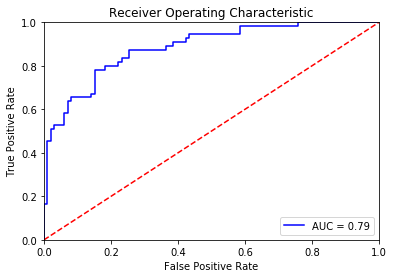

In [5]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("AUC: {}".format(roc_auc))
print("Classification Report: \n", class_report)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [6]:
#TODO
from sklearn.metrics import accuracy_score
import numpy as np
accuracy_score(y_test, y_pred)

0.8246753246753247

## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

The K-fold procedue method splits the data into a different training and test sets k times. So for 5-fold CV there will be five different train-test splits where every observation will appear in the a test set one time and then be in 4 training sets. The nice thing about k-fold validation is that you don't have to worry that much about having your test set randomly having a non-representative distribtion, everything is used in k-fold validation. 

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

In [8]:
from sklearn.model_selection import KFold, cross_val_score, ShuffleSplit

features = data[data.columns[:8]]
kfo = [3, 5, 7, 10]

for i in kfo:
    seed = 83
    kfold = KFold(n_splits=i, random_state=seed)
    model = LogisticRegression(random_state=83)
    results = cross_val_score(model, X, y, cv=kfold)
    print(i,"Fold Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))



# scores = #TODO

# print(scores.mean())

3 Fold Accuracy: 77.34% (3.04%)
5 Fold Accuracy: 76.70% (3.58%)
7 Fold Accuracy: 76.70% (4.06%)
10 Fold Accuracy: 76.95% (5.30%)


## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

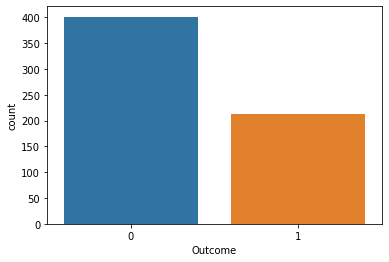

In [34]:
#TODO
import matplotlib.pyplot as plt
import seaborn as sns

# training data re-combined to perform up-sampling below
data_up = pd.concat([X_train, y_train], axis=1, sort=False)

sns.countplot(x='Outcome',data=data_up)
plt.show()

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [53]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data_up[data_up['Outcome']==0]
minority_class = data_up[data_up['Outcome']==1]
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(majority_class),   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

<h3> Q.9. Display new class counts</h3>

In [54]:
print("Original Training set:\n",data_up['Outcome'].value_counts())
print("Up sampled Training set:\n",data_upsampled['Outcome'].value_counts())

Original Training set:
 0    401
1    213
Name: Outcome, dtype: int64
Up sampled Training set:
 1    401
0    401
Name: Outcome, dtype: int64


In [59]:
data_upsampled.head() # data seems to be ordered by Outcome after the bootstrap

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
605,1,124,60,32,0,35.8,0.514,21,0
507,1,130,60,23,170,28.6,0.692,21,0
135,2,125,60,20,140,33.8,0.088,31,0
297,0,126,84,29,215,30.7,0.520,24,0
165,6,104,74,18,156,29.9,0.722,41,1


In [56]:
data_upsampled = data_upsampled.sample(frac=1)

<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

In [60]:
# Separate input features (X) and target variable (y)
y_up = data_upsampled[['Outcome']]
X_up = data_upsampled.iloc[:,:-1]

#Perform train test split 80/20
# X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=.2, random_state=83)
# This has already been done. I only upsampled the training set leaving the validation set as it was (and 
# would be in a real world data set). I am not peeking at the test data in other words. 

# Train model
clf_up = LogisticRegression(random_state=83).fit(X_up, y_up)

# Predict on training set
# *** Using original X_test not a resampled one for validation ***
y_pred_up = clf_up.predict(X_test)

# How's our accuracy? Has it improved? Comment
probs_up = clf_up.predict_proba(X_test)
preds_up = probs_up[:,1]
fpr_up, tpr_up, threshold_up = metrics.roc_curve(y_test, preds_up)
roc_auc_up = roc_auc_score(y_test, y_pred_up)
class_report_up = classification_report(y_test, y_pred_up)
acc_report_up = accuracy_score(y_test, y_pred_up)

# The AUC is about the same but the accuracy has gone down a bit. 
# The model is much better at predicting the minority class
# But the model's ability to predict the majority class has gone down.
# This is a better model than the first model if your goal is to find
# the minority class, you didn't really sacrifice much model performance
# to attain significantly better minority results. 


print("AUC: {}".format(roc_auc_up))
print("Classification Report: \n", class_report_up)
print("Accuracy: \n", acc_report_up)

AUC: 0.7808080808080808
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        99
           1       0.68      0.76      0.72        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 
 0.7857142857142857


<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

Coming into this assignment I had a fair amount of experience with k-fold/segmented k-fold methods but had not used the bootstrap method demonstrated here. I chose to only upsample the training data and didn't touch the test set that was generated earlier in the notebook. I did this because if you deployed this model you wouldn't be randomly resampling new data as it came in, so validating the model's performance on a test set that had been resampled would not provide an accurate assessment of the model's generalizability to new data. All of this is very useful and relevant to real world ML problems. 